In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **HARJOITUS 1.**

Muodosta yhden piilokerroksen neuroroverkko, jolla saavutetaan vähintään 99.5 %:n luokittelutarkkuus allaoleville datapisteille $x^{(i)}=[x_1^{(i)},x_2^{(i)}],\,y^{(i)}=0,1,2,3$

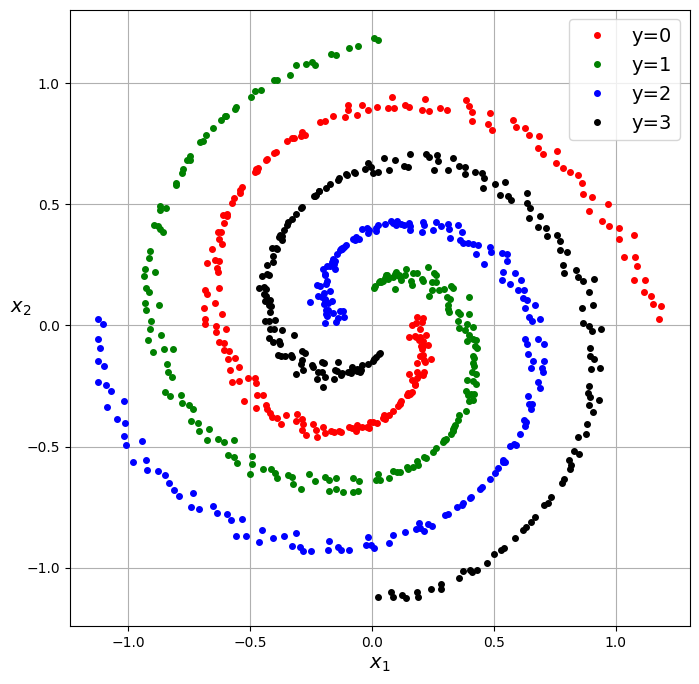

In [ ]:
np.random.seed(0)
n=200
m=4*n #datapisteiden määrä
th=np.linspace(0,2*np.pi,n)
r=0.15+np.linspace(0,1,n)
e=0.02*np.random.randn(n)
x11=r*np.cos(-th)+e
x12=r*np.sin(-th)+e

x21=r*np.cos(np.pi/2-th)+e
x22=r*np.sin(np.pi/2-th)+e
x31=r*np.cos(np.pi-th)+e
x32=r*np.sin(np.pi-th)+e
x41=r*np.cos(3*np.pi/2-th)+e
x42=r*np.sin(3*np.pi/2-th)+e


plt.figure(figsize=(8,8))    
plt.plot(x11,x12,'r.',markersize=8,label='y=0')
plt.plot(x21,x22,'g.',markersize=8,label='y=1')
plt.plot(x31,x32,'b.',markersize=8,label='y=2')
plt.plot(x41,x42,'k.',markersize=8,label='y=3')
plt.grid()
plt.xlabel('$x_1$',fontsize=14)
plt.ylabel('$x_2$',fontsize=14,rotation=0)
plt.legend(fontsize=14)
plt.show()

Muodosta confusion-matriisi

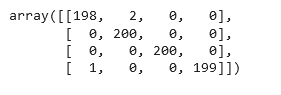

ja piirrä kuva syntyvästä tason pisteiden luokittelusta.

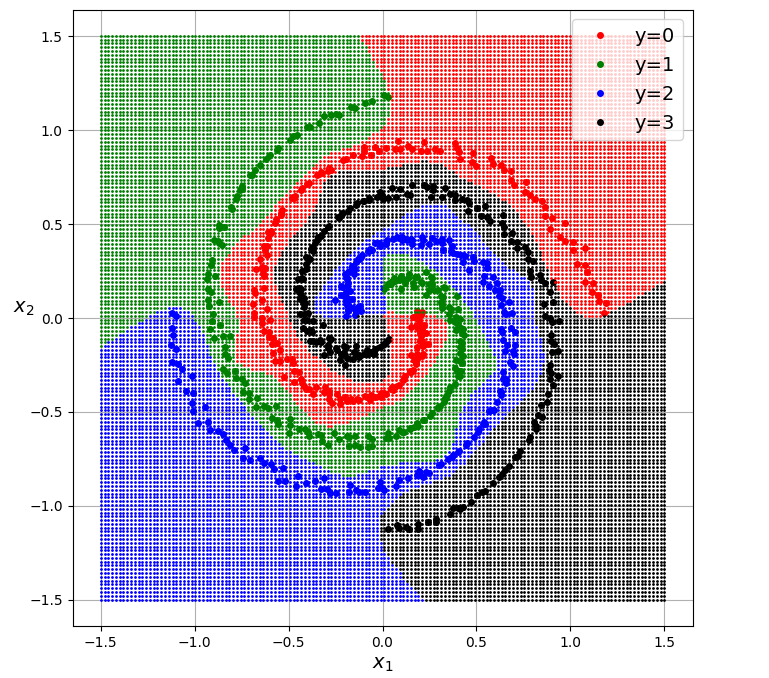

## **HARJOITUS 2.**

[Kagglen sign-language-mnist-datajoukko](https://www.kaggle.com/datasets/datamunge/sign-language-mnist/code)

mustavalkeita 28x28-pikselin kuvia viittomakielen aakkosista A-Y (poislukien J),
27455 training- ja 7172 testi-kuvaa.


Muodosta yhden piilokerroksen neuroverkko kuvien luokittelemiseksi, jolla saavutetaan vähintään 80 %:n testitarkkuus.




Laske verkon antamat todennäköisyydet satunnaisesti valitulle testikuvalle ja piirrä allaolevan näköinen kuva

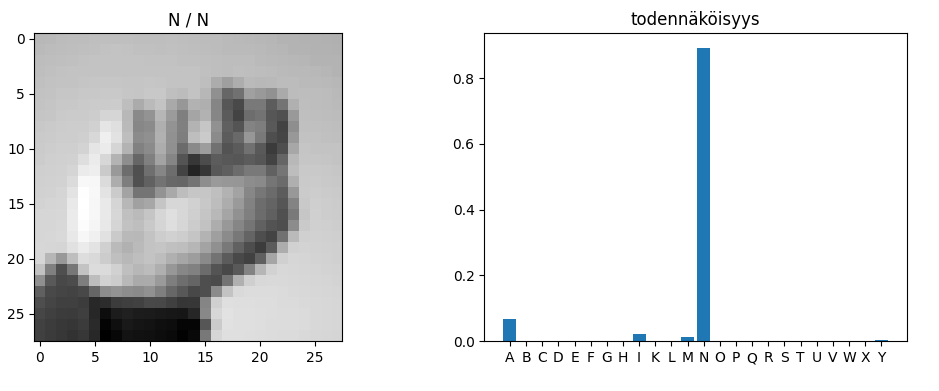

Lataa datajoukko itsellesi (tarvitset Kaggle-tilin), muodosta kansio sign_mnist jossa ovat tiedostot sign_mnist_train.csv ja sign_mnist_test.csv, zippaa se ja lataa driveesi.

In [ ]:
#kiinnitä drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pura tiedostot colabiin
!unzip '/content/drive/MyDrive/sign_mnist.zip' -d '/content'

Archive:  /content/drive/MyDrive/sign_mnist.zip
   creating: /content/sign_mnist/
  inflating: /content/sign_mnist/sign_mnist_test.csv  
  inflating: /content/sign_mnist/sign_mnist_train.csv  


In [ ]:
#lue tiedostot Pandas-kirjaston dataframeiksi
import pandas as pd
train_data=pd.read_csv('/content/sign_mnist/sign_mnist_train.csv',header=0)
test_data=pd.read_csv('/content/sign_mnist/sign_mnist_test.csv',header=0)
#ja muuta ne np.arrayksi
train_data=np.array(train_data)
test_data=np.array(test_data)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(27455, 785)
(7172, 785)


In [ ]:
xtrain=train_data[:,1:]/255.0
ytrain=train_data[:,0]
xtest=test_data[:,1:]/255.0
ytest=test_data[:,0]

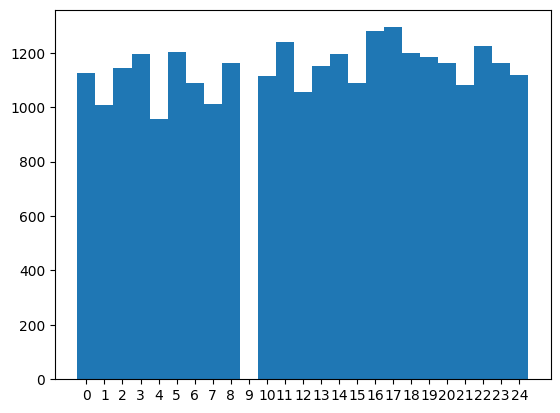

In [ ]:
plt.hist(ytrain,bins=np.arange(-0.5,25.5,1))
plt.xticks(np.arange(0,25,1))
plt.show()

In [ ]:
#luokka y=9 puuttuu (esittää aakkosta J))
#pienennetään luokkia 10...24 yhdellä
ytrain[ytrain>9]=ytrain[ytrain>9]-1
ytest[ytest>9]=ytest[ytest>9]-1

Y=['A','B','C','D','E','F','G','H','I','K','L','M',
   'N','O','P','Q','R','S','T','U','V','W','X','Y']

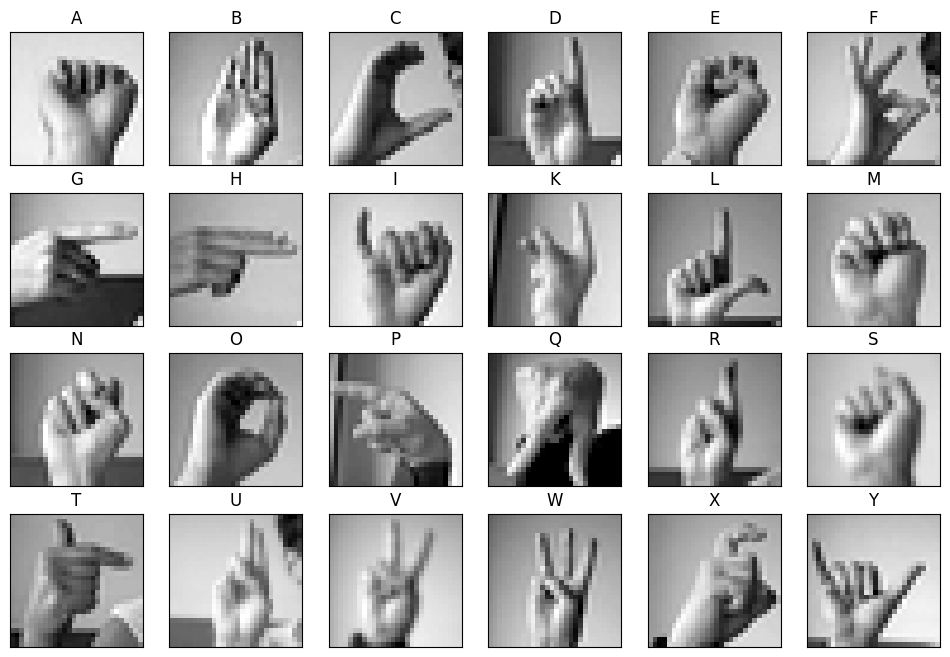

In [ ]:
#esimerkkikuvat
plt.figure(figsize=(12,8))
for k in range(24):
    xtraink=xtrain[ytrain==k,:]
    mk,nk=xtraink.shape
    indk=np.random.randint(mk)
    kuvak=xtraink[indk,:].reshape((28,28))
    plt.subplot(4,6,k+1)
    plt.imshow(kuvak, cmap='gray')
    plt.xticks([],[])
    plt.yticks([],[])
    plt.title(Y[k])

## **HARJOITUS 3.**

Muodosta yhden piilokerroksen neuroverkolla laskukaava suureelle $y$ käyttäen allaolevia datapisteitä $x^{(i)},y^{(i)}$ 

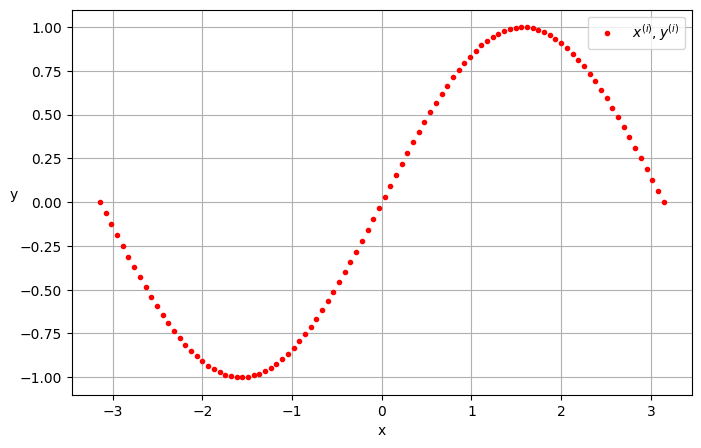

In [ ]:
x=np.linspace(-np.pi,np.pi,100)
y=np.sin(x)
plt.figure(figsize=(8,5))
plt.plot(x,y,'r.',label=r'$x^{(i)},y^{(i)}$')
plt.grid()
plt.xlabel('x')
plt.ylabel('y',rotation=0)
plt.legend()
plt.show()

jolla päästään allaolevan näköiseen yhteensopivuuteen

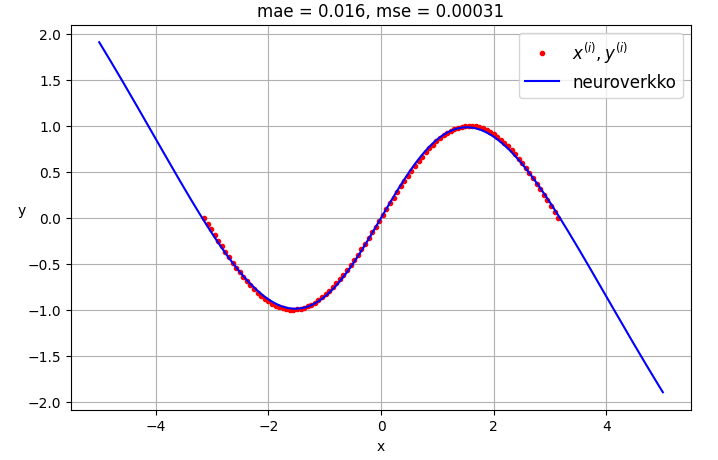

##**HARJOITUS 4**

Lataa [combined cycle powerplant-datajoukko](https://www.kaggle.com/datasets/gova26/airpressure) (tarvitset Kaggle-tilin), ja tuo se Colabiin 

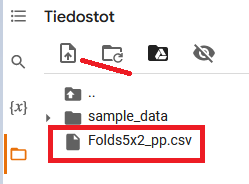

In [ ]:
#lue se Pandas-kirjaston dataframeksi
import pandas as pd
df=pd.read_csv('/content/Folds5x2_pp.csv')

In [ ]:
df.head() #5 ensimmäistä riviä

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


'AT': 'Average Temperature', 

'V': 'Exhaust Vacuum',

'AP': 'Ambient Pressure',

'RH': 'Relative Humidity ',

'PE': 'Net Hourly Electrical Energy Output'


In [ ]:
#muuta se numpy-arrayksi
data=np.array(df)
data.shape

(9568, 5)

Jaa datapisteet training-ja testidataksi (70%/30%), ja muodosta yhden piilokerroksen neuroverkolla laskukaava suureelle PE muuttujien 

AT, V, AP ja RH avulla, niin että testidatan mae on alle 3, ja piirrä allaolevan näköinen kuva

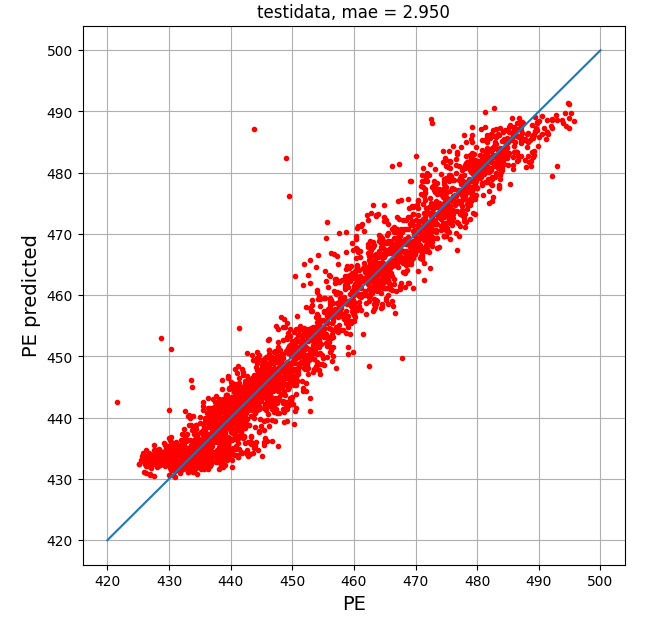